# Self-Driving Car Engineer Nanodegree


## Project: **Finding Lane Lines on the Road** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  You can develop your pipeline on a series of individual images, and later apply the result to a video stream (really just a series of images). Check out the video clip "raw-lines-example.mp4" (also contained in this repository) to see what the output should look like after using the helper functions below. 

Once you have a result that looks roughly like "raw-lines-example.mp4", you'll need to get creative and try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines.  You can see an example of the result you're going for in the video "P1_example.mp4".  Ultimately, you would like to draw just one line for the left side of the lane, and one for the right.

In addition to implementing code, there is a brief writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) that can be used to guide the writing process. Completing both the code in the Ipython notebook and the writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/322/view) for this project.

---
Let's have a look at our first image called 'test_images/solidWhiteRight.jpg'.  Run the 2 cells below (hit Shift-Enter or the "play" button above) to display the image.

**Note: If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".**

---

**The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection.  You  are also free to explore and try other techniques that were not presented in the lesson.  Your goal is piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below).  Once you have a working pipeline, try it out on the video stream below.**

---

<figure>
 <img src="examples/line-segments-example.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above) after detecting line segments using the helper functions below </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="examples/laneLines_thirdPass.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your goal is to connect/average/extrapolate line segments to get output like this</p> 
 </figcaption>
</figure>

**Run the cell below to import some packages.  If you get an `import error` for a package you've already installed, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt.  Also, consult the forums for more troubleshooting tips.**  

## Import Packages

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import glob

import matplotlib.image as mpimg
import numpy as np
from sklearn.linear_model import LinearRegression
import cv2
%matplotlib inline
#test
#strukturieren, sauber machen, text schreiben
#einzelbild auswertung. eine saubere sturktur und funktionen zum parameter testen

## Read in an Image

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


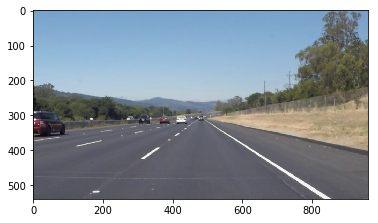

In [2]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

## Ideas for Lane Detection Pipeline

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images
`cv2.cvtColor()` to grayscale or change color
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

**Check out the OpenCV documentation to learn about these and discover even more awesome functionality!**

## Helper Functions

Below are some helper functions to help get you started. They should look familiar from the lesson!

# **Finding Lane Lines on the Road** 


**Finding Lane Lines on the Road**

The goals / steps of this project are the following:
* Make a pipeline that finds lane lines on the road
* Reflect on your work in a written report

Next I will talk about my approach to this challenge.
I added some pictures and videos produced by my code in this notebook. 
I also commented all of the code so this reflection is seen as an addition to that and might be redundant at points.


### Reflection

### 1. Describe your pipeline. As part of the description, explain how you modified the draw_lines() function.

The function defined as PaintLanes(image) takes said image and puts it through multiple steps of processing:

1. Converting to a grayscale image
2. Applying the gaussian filter to smooth out the edges
3. The canny filter gives us a picture with identified edges and is showing these
4. I then define a sector of any given image that is of interest. This allows me to leave out areas and unwanted result for the    later steps (see vertices)
5. I then mask the image showing the canny edges with this area of interest, to only keep these edges, leaving everything else      out/black
6. Using the hough lines transformation I can identify the lines with the respective coordinates
7. Within this hough line operation I use my updated function called "draw_linesIMPROVED" 
8. After tuning all the operations I talked about beforehand to get the result I expected on the test cases, I then proceeded to    optimize the "draw_linesIMPROVED" function. This has beend the point where it I put in most of my work and learned a lot.
   Hence I will write about this in an extra step:
   
##### Improved version of "draw_lines"
At first I tried just gathering the points from the hough transformation and just with some simple min/max tactics grabbing the end points of the lanes. And actually these results weren't that bad. I did have to tune some more of my parameters like adjusting the vertices to accomodate all test pictures given. But I was not really happy about the outcome because lines were just way smaller than the actual visible lane markings or were of a little and so on. 
I also had to implement it in a way that the slope gives away which lane the lines in the array belong to. With this I was able to have a general separation. But I was stil getting some bad results so I went ahead and tried a linear regression to get the best fit line for both sides. The results actually were worse then the simplistic approach. So I went back to the first simple approach but had to think of ways of improving it. Especially on videos I was not happy with my stand at this point. The painted lanes were flickering around (even ranging over to the other side of the lane), being inconsitent and just didn't look on point most of the time. To make my life eassier with debugging and improving I created 3 steps to analyze videos on my own: Take video and write single frames to folder. Loop through these with the pipeline and write the output to a different folder. Take the frames and put them back together as the output video...
With this I was able to analyze single frames any what was going on exactly. So I will go over my steps in this final function now and talk about the though process:

1. Grab global variables and initialize all needed variables
2. Divide the vales from hough to left and right by checking the slope and making sure that the points are in the right general    area of the frame (I was having lines being recognized of other stuff on the road etc.) 
3. If nothing was foun my Arrays would be empty, creating an error, so in that case I append a "0" and set "FoundIt" to False.
4. If nothing was found in that frame (FoundIt=False) I then use the values of the previous frame to continue. This seems to        work well sind the change happening between each frame is not that crucial at these somewhat "slow speeds" of the car. So I      think this assumption works well.
5. I then grab the minimum Value of x within the left lane Array and assume this is my starting point of the lane on the bottom.    Using the same method for the other values I needed.
6. I found that the lanes with gaps for example but also the consistent lanes would sometimes make my lane markings too short. I    wanted them to start at the bottom of the screen and extend at least to value where it would make sense that lanes could        still be detected in the far. So with the slope of the two points I picked to create the line I extended these to the bottom    and towards the top with using the slope and the general function of a line. I only did this if the line did not already        reach these points.
7. This already gave me pretty good output. But still, It did not look too smoth. The lines were flickering between each frame.     Sometimes the slope had been pretty off. So if the original line was pretty small and the slope was a bit off, the extension     of point 6 made it to where I wasn't always keeping a good track of the lane at the beginning and end in many frames.
    So I though that I could implement it to where it did not accept too big changes in between frames.
    So I limited the change of each point in each direction and if it was exceeded in regards to the previous frame, it only         ajusted the lane to that max extent of allowed change.
    With this I was able to get really good output. Even the "challenge" video is handled quite well I think. 

9. Continuing the general pipeline with the updates mentioned above I then merged the found lines with the original image and      returning that image.



### 2. Identify potential shortcomings with your current pipeline


I now implemented a maximum change of 1 pixel per frame for each coordinate. At high speeds (or low camera framerates) and drastically changing lane conditions this could cause problems.
I also do not know how my code performs if a car crosses into my lane. I would like to test that.
As seen if my code is applied to the "challenge" video strong curves make the painted lanes cross right now, because the extension is too big and it is not optimized for that case.
Also with difficult light settings or different camera positions my code might be having trouble. So it is not as generic as I would like it to be with different camera resultions and positions some things like masking might be off.


### 3. Suggest possible improvements to your pipeline

I could also implement it to where the end points of both painted lanes on the top always have to have a certain distance and hence stop this extension that causes the painted lanes to cross.
I would also like to improve it to where the painted lanes are not linear but can also take the shape of a curve and hence creating a more realistic view for the system. 


In [3]:
import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    `vertices` should be a numpy array of integer points.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=10):
    #dummy, see "draw_linesIMPROVED" for the new version   
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

                



def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_linesIMPROVED(line_img, lines)

    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., γ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + γ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, γ)

In [4]:
#global variables
RunCounter=0
houghLinesPrev=0
FoundItRight=True
FoundItLeft=True
PrXRight=[]
PrYRight=[]
PrXLeft=[]
PrYLeft=[]
PrLinesCombinedLeft=[]
PrLinesCombinedRight=[]


In [5]:
#############################################################################
#############################################################################
#############################################################################
#### This is the Image pipeline to take the lines found through hough and
#### the previous operations and then draws the 2 found lanes on the frame 
#### it was given. There are multiple steps involved to get a good homogenous
#### appearance of the lanes on the road.
#############################################################################
#############################################################################
#############################################################################

def draw_linesIMPROVED(img, lines, color=[255, 0, 0], thickness=13):

    ############################################################################# 
    #### initialize variables and define that we are using the global variables here
    #### for history tracking and further functionality.
    #############################################################################
    ystart=0
    yend=0
    xstart=0
    xend=0
    slopesR=[]
    slopesL=[]
    XRight=[]
    XLeft=[]
    YRight=[]
    YLeft=[]
    global PrXRight
    global PrYRight
    global PrXLeft
    global PrYLeft 
    global FoundItRight
    global FoundItLeft
    global RunCounter
    global PrLinesCombinedLeft
    global PrLinesCombinedRight
    maxChange=1
    imshape=img.shape
       

    #Gather points for right lane (positive slope & right half of screen only)
    for line in lines:
        for x1,y1,x2,y2 in line:
            if ((((y2-y1)/(x2-x1))>0) and (x1>(imshape[1]/2)-10) and (x2>(imshape[1]/2)-10)):
                slopesR.append((y2-y1)/(x2-x1))
                YRight.append(y1) 
                YRight.append(y2)
                XRight.append(x1)
                XRight.append(x2)
                
    #averageSlopeR=sum(slopesR)/len(slopesR)
        #Gather points for left lane (negative slope & left half of screen only)
    for line in lines:
        for x1,y1,x2,y2 in line:
            if ((((y2-y1)/(x2-x1))<0) and (x1<(imshape[1]/2)+10) and (x2<(imshape[1]/2)+10)):
                slopesL.append((y2-y1)/(x2-x1))
                YLeft.append(y1) 
                YLeft.append(y2)
                XLeft.append(x1)
                XLeft.append(x2)


    
    #############################################################################
    ####populate with one entry "0" if empty to avoid errors
    #############################################################################
    if (len(XRight)==0):
        XRight.append(0)
        FoundItRight=False
    if (len(XLeft)==0):
        XLeft.append(0)
        FoundItLeft=False
    if (len(YRight)==0):
        YRight.append(0)
        FoundItRight=False
    if (len(YLeft)==0):
        YLeft.append(0)
        FoundItLeft=False

    ############################################################################# 
    ####if nothing was found in this frame --> use previously saved frame
    #### in case of weird lighting or any other strange things happening to the values
    #### this ensures to still have reasonable input because from one frame to the next
    #### the situation won't change that drastically
    #############################################################################
    if (FoundItLeft==False):
        #Do something
        XLeft=PrXLeft
        YLeft=PrYLeft
        FoundItLeft=True
    if (FoundItRight==False):
        #Do something
        XRight=PrXRight
        YRight=PrYRight
        FoundItRight=True
        
        
    #############################################################################
    #### Linear Regression does not seem to give the performance needed
    #### that is why I went back to the more simplistic model of the mind and max values of 
    #### my previous filterung of unwanted lines/points. With the above tweaking that seems to work pretty
    #### well. So this can be disregarded
    #############################################################################
    #averageSlopeL=sum(slopesL)/len(slopesL) 
    #create arrays of all X and Y Values
    #yvals1=lines[:,0,1]
    #yvals2=lines[:,0,3]
    #yvals=np.concatenate((yvals1,yvals2))
    #xvals1=lines[:,0,0]
    #xvals2=lines[:,0,2]
    #xvals=np.concatenate((xvals1,xvals2))
    #Linear Regression of Right and Left lane #linear regression discarded
    #Need to reshape the arrays for a 2D #linear regression discarded
    #XRightArray=np.asarray(XRight).reshape(-1, 1)
    #XLeftArray=np.asarray(XLeft).reshape(-1, 1)
    #Rightlinear_regressor = LinearRegression() 
    #Rightlinear_regressor.fit(XRightArray, YRight)  
    #Leftlinear_regressor = LinearRegression()  
    #Leftlinear_regressor.fit(XLeftArray, YLeft) 

    
    
    
    #############################################################################
    #### trivial setting of initial values for the 2 lanes
    #### using the minimum and maximum values found in the houghlines
    #### furthermore these will be tuned to give a pretty accurate output in the course
    #### of this code
    #############################################################################
    x1Left=min(XLeft)
    x1Right=max(XRight)
    y1Left=max(YLeft)
    y1Right=max(YRight)
    y2Left=min(YLeft)
    y2Right=min(YRight)
    x2Right=min(XRight)
    x2Left=max(XLeft)
    
    
    if RunCounter>1:
        
        #############################################################################
        ####if change is too big to be reasonable (take the previous stand)
        ####not needed anymore
        #############################################################################        
        #if (x2Left<(max(PrXLeft)-350)):
        #    dummy=0  
        #if (x2Right>(min(PrXRight)-350)):
        #    dummy2=0
            
        #############################################################################
        ####Extend found lane to a certain point of the screen.
        ####First two "if" statements extend towards the horizon
        ####Last two "if" statements extend to the bottom of the screen
        #############################################################################
        if (y2Left>imshape[0]/2+65):
            slopeLeft=((y2Left-y1Left)/(x2Left-x1Left))
            x2Left=int((imshape[0]/2+65-y2Left+slopeLeft*x2Left)/slopeLeft)
            y2Left=int(imshape[0]/2+65)
            dummy=0
            
        if (y2Right>imshape[0]/2+65):
            slopeRight=((y2Right-y1Right)/(x2Right-x1Right))
            x2Right=int((imshape[0]/2+65-y2Right+slopeRight*x2Right)/slopeRight)
            y2Right=int(imshape[0]/2+65)
            dummy=0
        #############################################################################
        ####this is where the extension to the bottom starts
        #############################################################################
        if (y1Left<imshape[0]-10):
            slopeLeft=((y2Left-y1Left)/(x2Left-x1Left))
            x1Left=int((imshape[0]-5-y2Left+slopeLeft*x2Left)/slopeLeft)
            y1Left=imshape[0]-5
            dummy=0
            
        if (y1Right<imshape[0]-10):
            slopeRight=((y2Right-y1Right)/(x2Right-x1Right))
            x1Right=int((imshape[0]-5-y2Right+slopeRight*x2Right)/slopeRight)
            y1Right=imshape[0]-5
            dummy=0
         
        
        #############################################################################
        ####Left Max Change according to value given at the beginning of this section
        ####smoothes out "hic hacs" to make for more senseful lane markings.
        ####Change is being tracked in both directions, hence we need a lot of 
        ####conditional statements.
        ####Uses previous values
        #############################################################################
        
        if ((x1Left-PrLinesCombinedLeft[0])>maxChange):
            x1Left=PrLinesCombinedLeft[0]+maxChange
        if ((x1Left-PrLinesCombinedLeft[0])<-maxChange):
            x1Left=PrLinesCombinedLeft[0]-maxChange
        
        if ((y1Left-PrLinesCombinedLeft[1])>maxChange):
            y1Left=PrLinesCombinedLeft[1]+maxChange           
        if ((y1Left-PrLinesCombinedLeft[1])<-maxChange):
            y1Left=PrLinesCombinedLeft[1]-maxChange            

        if ((x2Left-PrLinesCombinedLeft[2])>maxChange):
            x2Left=PrLinesCombinedLeft[2]+maxChange
        if ((x2Left-PrLinesCombinedLeft[2])<-maxChange):
            x2Left=PrLinesCombinedLeft[2]-maxChange
        
        if ((y2Left-PrLinesCombinedLeft[3])>maxChange):
            y2Left=PrLinesCombinedLeft[3]+maxChange           
        if ((y2Left-PrLinesCombinedLeft[3])<-maxChange):
            y2Left=PrLinesCombinedLeft[3]-maxChange
            
        #############################################################################
        ####Left Max Change according to value given at the beginning of this section
        ####see above, just adopted for right side
        #############################################################################
        if ((x1Right-PrLinesCombinedRight[0])>maxChange):
            x1Right=PrLinesCombinedRight[0]+maxChange
        if ((x1Right-PrLinesCombinedRight[0])<-maxChange):
            x1Right=PrLinesCombinedRight[0]-maxChange
        
        if ((y1Right-PrLinesCombinedRight[1])>maxChange):
            y1Right=PrLinesCombinedRight[1]+maxChange           
        if ((y1Right-PrLinesCombinedRight[1])<-maxChange):
            y1Right=PrLinesCombinedRight[1]-maxChange            

        if ((x2Right-PrLinesCombinedRight[2])>maxChange):
            x2Right=PrLinesCombinedRight[2]+maxChange
        if ((x2Right-PrLinesCombinedRight[2])<-maxChange):
            x2Right=PrLinesCombinedRight[2]-maxChange
        
        if ((y2Right-PrLinesCombinedRight[3])>maxChange):
            y2Right=PrLinesCombinedRight[3]+maxChange           
        if ((y2Right-PrLinesCombinedRight[3])<-maxChange):
            y2Right=PrLinesCombinedRight[3]-maxChange 

        
    #############################################################################
    #### Linear Regression does not seem to give the performance needed
    #### so it can also be disregarded
    #############################################################################    
    #x2Right=int(((y2Right-Rightlinear_regressor.intercept_))/Rightlinear_regressor.coef_[0]) # linear regression discarded
    #x2Left=int(((-y2Left-Leftlinear_regressor.intercept_))/Leftlinear_regressor.coef_[0])  # linear regression discarded


    
    
    #############################################################################
    ####Drawing the found lanes
    ####right lane:
    #############################################################################
    cv2.line(img, (x1Right, y1Right), (x2Right, y2Right), [0,255,0], thickness)
    ####left lane
    cv2.line(img, (x1Left, y1Left), (x2Left, y2Left), [0,255,0], thickness)

    
    #############################################################################
    ####store prev values in global variables and increase the runcounter.
    #############################################################################
    PrXRight=XRight
    PrYRight=YRight
    PrXLeft=XLeft
    PrYLeft=YLeft
    PrLinesCombinedLeft=[x1Left,y1Left,x2Left,y2Left]
    PrLinesCombinedRight=[x1Right,y1Right,x2Right,y2Right]  
    RunCounter+=1


## Test Images

Build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

In [6]:
#############################################################################
#############################################################################
#############################################################################
#### This is the Image pipeline to take a single frame and execute multiple 
#### operations on that frane and then return said frame. 
#### Within the hough_lines(...) function we also call the "draw_linesIMPROVED"
#### function that draws the lines on the process picture in a more sophisticated manner
#### The parameters of the functions have been tuned to give a solid output on 
#### all the test cases given.
#############################################################################
#############################################################################
#############################################################################
def PaintLanes(image):
    # Transform to gray and display image
    global houghLinesPrev
    global FoundIt
    gray=grayscale(image)

    #Apply gaussian filter
    gray_gaussian=gaussian_blur(gray,5)

    #Canny Filter the processed image to just show the edges
    edges=canny(gray_gaussian,45,155)

    #Mask the region and show the output // tuned variables accordingly
    imshape = image.shape
    vertices = np.array([[(105,imshape[0]),(imshape[1]/2-50, imshape[0]/2+60), (imshape[1]/2+55, imshape[0]/2+60), (imshape[1]-45,imshape[0])]], dtype=np.int32)
    maskedpic=region_of_interest(edges,vertices)
    #plt.imshow(maskedpic)
    #Find the lines in the image using this function
    houghLines=hough_lines(maskedpic, 1, np.pi/180, 1, 10, 5)
    
    #combine the images to show the lanes on the original image
    finalImage=weighted_img(houghLines, image, α=0.95, β=1., γ=0.)
    #plt.imshow(finalImage)
    return finalImage
  

['solidYellowLeft.jpg',
 'solidYellowCurve.jpg',
 'solidWhiteRight.jpg',
 'solidYellowCurve2.jpg',
 'solidWhiteCurve.jpg',
 'whiteCarLaneSwitch.jpg']

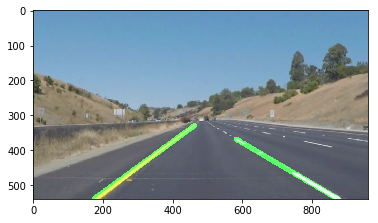

In [7]:
#test fpr single Images
import os
os.listdir("test_images/")
RunCounter=0
houghLinesPrev=0
FoundItRight=True
FoundItLeft=True
PrXRight=[]
PrYRight=[]
PrXLeft=[]
PrYLeft=[]
PrLinesCombinedLeft=[]
PrLinesCombinedRight=[]
image = mpimg.imread('test_images/solidYellowLeft.jpg')
image = mpimg.imread('test_images/solidYellowCurve.jpg')
image = mpimg.imread('test_images/solidWhiteRight.jpg')
image = mpimg.imread('test_images/solidYellowCurve2.jpg')
image = mpimg.imread('test_images/solidWhiteCurve.jpg')
image = mpimg.imread('test_images/whiteCarLaneSwitch.jpg')


finalImage=PaintLanes(image)
plt.imshow(finalImage)

I have created the next 3 sections to process video analysis in my own way so that I can have a look at single particular frames for debugging and enhancement of my code.

In [8]:
############################################################################
####Video to single Frames for input to the tested functions
############################################################################
vidcap = cv2.VideoCapture('test_videos/solidWhiteRight.mp4')
success,image = vidcap.read()

####internal variables for debugging
count = 0

####grab each frame and save it
while success:
    cv2.imwrite("test_videos/SingleFramesRaw/frame%d.jpg" % count, image)     # save frame as JPEG file      
    success,image = vidcap.read()
    #plt.imshow(image)
    #PaintLanes(image)
    #print('Read a new frame: ', success)    
    count += 1
print(count)


221


In [9]:
############################################################################
####Apply the pipeline (PaintLanes()) to all frames extraced
############################################################################

####reset globals before starting the pipeline
RunCounter=0
houghLinesPrev=0
FoundItRight=True
FoundItLeft=True
PrXRight=[]
PrYRight=[]
PrXLeft=[]
PrYLeft=[]
PrLinesCombinedLeft=[]
PrLinesCombinedRight=[]
####

####internal variables for debugging
processCount=0


while (processCount<count):
    finalImage=PaintLanes(cv2.imread("test_videos/SingleFramesRaw/frame%d.jpg" % processCount))
    cv2.imwrite("test_videos/SingleFramesAltered/frame%d.jpg" % processCount, finalImage)
    processCount+=1
    #print (processCount)
print(processCount)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in int_scalars
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in int_scalars
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in int_scalars


221


In [10]:
############################################################################
####put altered (incl lane markings) frames back to video
############################################################################

####internal variables for debugging and Array to store frames
FrameArray = []
processCountVideo=0

while (processCountVideo<count):
    img = cv2.imread("test_videos/SingleFramesAltered/frame%d.jpg" % processCountVideo)
    height, width, layers = img.shape
    size = (width,height)
    FrameArray.append(img)
    processCountVideo+=1


out = cv2.VideoWriter('test_videos/FinalVideoOutput/project.mp4',cv2.VideoWriter_fourcc(*'MP4V'), 15, size)
 
for i in range(len(FrameArray)):
    out.write(FrameArray[i])
out.release()
print(processCountVideo)

221


## Build a Lane Finding Pipeline



Build the pipeline and run your solution on all test_images. Make copies into the `test_images_output` directory, and you can use the images in your writeup report.

Try tuning the various parameters, especially the low and high Canny thresholds as well as the Hough lines parameters.

In [11]:
# TODO: Build your pipeline that will draw lane lines on the test_images
# then save them to the test_images_output directory.

## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

**Note: if you get an import error when you run the next cell, try changing your kernel (select the Kernel menu above --> Change Kernel). Still have problems? Try relaunching Jupyter Notebook from the terminal prompt. Also, consult the forums for more troubleshooting tips.**

**If you get an error that looks like this:**
```
NeedDownloadError: Need ffmpeg exe. 
You can download it by calling: 
imageio.plugins.ffmpeg.download()
```
**Follow the instructions in the error message and check out [this forum post](https://discussions.udacity.com/t/project-error-of-test-on-videos/274082) for more troubleshooting tips across operating systems.**

In [12]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [13]:
def process_image(image):
#NOT NEEDED: See above implementation (PaintLanes)
     return result

Let's try the one with the solid white lane on the right first ...

Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [14]:
####reset globals before starting the pipeline
RunCounter=0
houghLinesPrev=0
FoundItRight=True
FoundItLeft=True
PrXRight=[]
PrYRight=[]
PrXLeft=[]
PrYLeft=[]
PrLinesCombinedLeft=[]
PrLinesCombinedRight=[]
########
white_output = 'test_videos_output/solidWhiteRight.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(PaintLanes) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidWhiteRight.mp4
[MoviePy] Writing video test_videos_output/solidWhiteRight.mp4


100%|█████████▉| 221/222 [00:12<00:00, 17.18it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidWhiteRight.mp4 

CPU times: user 2.58 s, sys: 181 ms, total: 2.76 s
Wall time: 14.6 s


In [15]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

## Improve the draw_lines() function

**At this point, if you were successful with making the pipeline and tuning parameters, you probably have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)?  Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform. As mentioned previously, try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines. You can see an example of the result you're going for in the video "P1_example.mp4".**

**Go back and modify your draw_lines function accordingly and try re-running your pipeline. The new output should draw a single, solid line over the left lane line and a single, solid line over the right lane line. The lines should start from the bottom of the image and extend out to the top of the region of interest.**

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [16]:
####reset globals before starting the pipeline
RunCounter=0
houghLinesPrev=0
FoundItRight=True
FoundItLeft=True
PrXRight=[]
PrYRight=[]
PrXLeft=[]
PrYLeft=[]
PrLinesCombinedLeft=[]
PrLinesCombinedRight=[]
########
yellow_output = 'test_videos_output/solidYellowLeft.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
#clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4').subclip(0,5)
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(PaintLanes)
%time yellow_clip.write_videofile(yellow_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidYellowLeft.mp4
[MoviePy] Writing video test_videos_output/solidYellowLeft.mp4


100%|█████████▉| 681/682 [00:43<00:00, 15.53it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidYellowLeft.mp4 

CPU times: user 7.93 s, sys: 601 ms, total: 8.53 s
Wall time: 45.6 s


In [17]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Writeup and Submission

If you're satisfied with your video outputs, it's time to make the report writeup in a pdf or markdown file. Once you have this Ipython notebook ready along with the writeup, it's time to submit for review! Here is a [link](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) to the writeup template file.


## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

In [18]:
####reset globals before starting the pipeline
RunCounter=0
houghLinesPrev=0
FoundItRight=True
FoundItLeft=True
PrXRight=[]
PrYRight=[]
PrXLeft=[]
PrYLeft=[]
PrLinesCombinedLeft=[]
PrLinesCombinedRight=[]
####
challenge_output = 'test_videos_output/challenge.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
#clip3 = VideoFileClip('test_videos/challenge.mp4').subclip(0,5)
clip3 = VideoFileClip('test_videos/challenge.mp4')
challenge_clip = clip3.fl_image(PaintLanes)
%time challenge_clip.write_videofile(challenge_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/challenge.mp4
[MoviePy] Writing video test_videos_output/challenge.mp4


100%|██████████| 251/251 [00:32<00:00,  7.56it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/challenge.mp4 

CPU times: user 5.62 s, sys: 939 ms, total: 6.56 s
Wall time: 36.2 s


In [19]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))